# Regression and Other Stories: Chapter 7

In [4]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from bambi import Model
import arviz as az
import numpy as np

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
hibbs = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat",
                    delimiter=" ")



Text(0, 0.5, "Incumbent party's vote share")

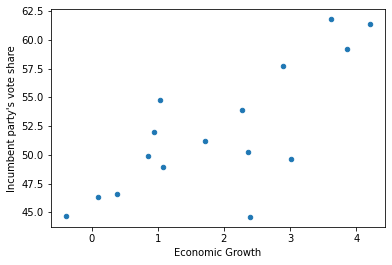

In [6]:
fig, ax = plt.subplots()
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel("Economic Growth")
ax.set_ylabel("Incumbent party's vote share")

In [7]:
model = Model(hibbs)
results = model.fit('vote ~ growth', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vote_sd, growth, Intercept]
INFO:pymc3:NUTS: [vote_sd, growth, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [8]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],47.080,1.128
growth[0],2.664,0.472
vote_sd,3.978,0.516


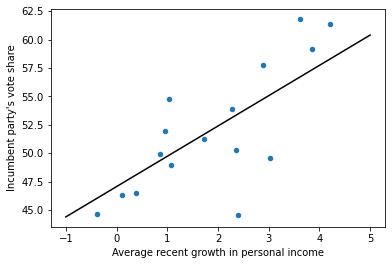

In [9]:
fig, ax = plt.subplots()

hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel("Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share")

x = np.array([-1, 5])

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["growth[0]", "Median"]

ax.plot(x, a_hat+b_hat*x, c="black");

In [10]:
1 - stats.norm(52.3, 3.9).cdf(50)

0.7223187166432111

In [11]:
a = 46.3
b = 3.0
sigma = 3.9
x = hibbs["growth"]
n = x.shape

In [12]:
y = a + b*x + stats.norm(0, sigma).rvs(n)
fake = pd.DataFrame(dict(x=x, y=y))

In [13]:
model = Model(fake)
results = model.fit('y ~ x', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_sd, x, Intercept]
INFO:pymc3:NUTS: [y_sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [14]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],46.412,1.151
x[0],2.775,0.479
y_sd,4.083,0.505


In [16]:
b_hat, b_se = coefs.loc["x[0]"]

In [19]:
cover_68 = np.abs(b-b_hat) < b_se
cover_95 = np.abs(b-b_hat) < 2*b_se
print(f"68% coverage: {cover_68}")
f"95% coverage: {cover_95}"

68% coverage: True


'95% coverage: True'